In [9]:
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

import pandas as pd

In [15]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
df_train = pd.read_csv('MNIST_sign_language/sign_mnist_train/sign_mnist_train.csv')

# Download FMNIST test dataset and load test data
df_test = pd.read_csv('MNIST_sign_language/sign_mnist_test/sign_mnist_test.csv')

In [16]:
class Sign_Lang_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = Sign_Lang_Model()

<bound method NDFrame.describe of       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         6     149     149     150     150     150     151     151     150   
1         5     126     128     131     132     133     134     135     135   
2        10      85      88      92      96     105     123     135     143   
3         0     203     205     207     206     207     209     210     209   
4         3     188     191     193     195     199     201     202     203   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
7167      1     135     119     108     102     105      99      61     103   
7168     12     157     159     161     164     166     166     171     174   
7169      2     190     191     190     191     190     190     192     192   
7170      4     201     205     208     209     214     216     218     223   
7171      2     173     174     173     174     173     173     175     175   

      pixel9  ...

In [23]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for j in df_test:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 0.6733219295358861
Training loss: 0.045107523166040366
Training loss: 0.011913179861766888


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

images = next(iter(df_test))

test_image_id = 1
img = images[test_image_id] 

with torch.no_grad():
    logps = model(img)

AttributeError: 'str' object has no attribute 'view'

<BarContainer object of 10 artists>

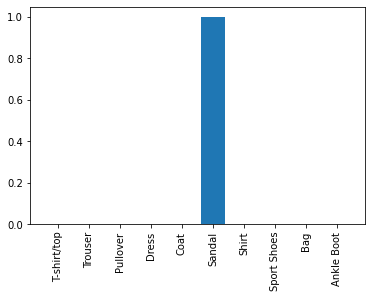

In [31]:
ps = torch.exp(logps)
nps = ps.numpy()[0]
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boot']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

In [32]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

AttributeError: 'str' object has no attribute 'view'